In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn import metrics
%matplotlib inline
%config InLineBackend.figure_format = 'svg'

In [2]:
matplotlib.rcParams.update({'font.size': 14})

In [3]:
train = 'train.csv'

In [4]:
df = pd.read_csv(train)
df.head(10)


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [5]:
df.shape

(10000, 20)

Изменяем формат столбца id

In [6]:
df['Id'] = df['Id'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null object
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(8), object(4)
memory usage: 1.5+ MB


In [8]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Обработка пропусков


In [9]:
len(df) - df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [10]:
def change (x):
    df.loc[df[x].isnull(), x] = df[x].median()

In [11]:
change ('LifeSquare')

change ('Healthcare_1')

In [12]:
len(df) - df.count()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [13]:
df_obj_features = df.select_dtypes(include = 'object')
df_obj_features.head()

,Id,Ecology_2,Ecology_3,Shops_2
0,14038,B,B,B
1,15053,B,B,B
2,4765,B,B,B
3,5809,B,B,B
4,10783,B,B,B


In [14]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [15]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [16]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

Обработка выбросов



Обработка минимумов

In [17]:
df[df['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,900.0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,900.0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,32.781260,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,32.781260,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,32.781260,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,900.0,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,900.0,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,219281.918007


In [18]:
def change_null (x):
    df.loc[df[x] == 0, x] = df[x].median()

In [19]:
change_null('Rooms')

In [20]:
df[df['HouseFloor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,32.781260,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,221244.156664
23,6641,54,3.0,118.907612,32.781260,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,337299.867936
39,9371,23,2.0,60.503248,32.781260,0.0,16,0.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,229778.057902
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,12302,30,1.0,46.072913,48.307844,0.0,4,0.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,161403.094034
9769,9384,59,3.0,98.607328,32.781260,0.0,14,0.0,1977,0.019509,B,B,37,7687,11,176.0,5,5,B,492700.257473
9878,11441,62,2.0,71.985335,72.453232,0.0,5,0.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,158841.624543
9908,3171,62,1.0,35.873961,32.781260,0.0,25,0.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,134379.130962


In [21]:
change_null('HouseFloor')

In [22]:
df[df['Ecology_1'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
11,12427,31,3.0,68.808859,45.736906,7.0,1,8.0,1959,0.0,B,B,23,3684,2,900.0,0,4,B,165534.541425
35,6486,200,3.0,85.280389,58.447967,9.0,6,5.0,1960,0.0,B,B,33,7425,1,900.0,2,5,B,402871.916317
38,8224,177,3.0,77.873936,48.991133,12.0,9,25.0,2012,0.0,B,B,36,6714,2,2672.0,0,2,B,191550.121357
80,15600,108,2.0,49.888740,31.603650,6.0,9,12.0,1974,0.0,B,B,23,3684,2,900.0,0,4,B,261086.024406
83,2855,18,2.0,61.718553,33.040115,10.0,10,11.0,2000,0.0,B,B,30,5562,0,900.0,0,5,A,267609.827251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9916,16712,109,2.0,58.139901,36.954603,10.0,14,18.0,1983,0.0,B,B,25,5027,4,46.0,1,1,B,363907.452149
9958,12878,46,1.0,39.143939,22.650690,8.0,14,12.0,1981,0.0,B,B,47,11319,0,1145.0,3,5,B,182459.513851
9968,6653,17,2.0,41.157437,27.489713,6.0,3,19.0,1967,0.0,B,B,18,3374,5,620.0,1,2,B,87265.399045
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.0,B,B,30,5562,0,900.0,0,5,A,189050.289571


In [23]:
change_null('Ecology_1')

In [24]:
df[df['Social_1'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,900.0,0,0,B,95338.198549
39,9371,23,2.0,60.503248,32.781260,0.0,16,13.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,229778.057902
46,1821,23,2.0,49.929489,32.781260,1.0,9,12.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,88464.425395
103,11765,23,2.0,48.760132,32.781260,1.0,3,3.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,113250.426500
152,14141,23,2.0,57.699619,32.781260,10.0,2,1.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,114168.532703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,6054,23,1.0,40.717990,32.781260,1.0,3,4.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,78606.777118
9843,15078,23,3.0,83.181257,81.578352,1.0,11,17.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,200783.181138
9903,4153,23,1.0,32.879523,30.397748,1.0,9,9.0,2015,0.034656,B,B,0,168,0,900.0,0,0,B,70098.380568
9961,1579,23,1.0,27.331108,32.781260,1.0,10,12.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,60825.032060


In [25]:
change_null('Social_1')

In [26]:
df[df['Social_3'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34.0,7759,0,229.0,1,3,B,220925.908524
8,5172,1,2.0,64.511437,32.781260,1.0,9,17.0,1977,0.007122,B,B,1.0,264,0,900.0,0,1,B,229102.795999
16,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,B,B,5.0,1227,0,900.0,0,0,B,117000.381287
21,11935,27,2.0,64.711835,32.781260,1.0,15,1.0,1977,0.211401,B,B,9.0,1892,0,900.0,0,1,B,127200.026511
23,6641,54,3.0,118.907612,32.781260,0.0,2,13.0,1977,0.006076,B,B,30.0,5285,0,645.0,6,6,B,571069.052600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,15623,23,2.0,55.620092,32.781260,0.0,2,4.0,1977,0.034656,B,B,25.0,168,0,900.0,0,0,B,115797.553006
9988,14025,53,2.0,54.167124,33.766477,8.0,5,23.0,1987,0.049637,B,B,34.0,7759,0,229.0,1,3,B,261095.834383
9991,11553,3,3.0,101.622794,51.628780,12.0,18,17.0,2000,0.265089,B,B,37.0,5288,0,1937.0,3,2,B,212883.501504
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.075424,B,B,30.0,5562,0,900.0,0,5,A,189050.289571


In [27]:
change_null('Social_3')

In [28]:
df[df['Square'] < 25]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43.0,8429,3.0,900.0,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4.0,915,2.0,900.0,0,0,B,107604.269441
1476,1775,101,1.0,23.583220,18.442768,3.0,3,5.0,1968,0.225825,A,B,41.0,6558,7.0,1548.0,3,2,B,108232.647619
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5.0,1564,2.0,540.0,0,0,B,137597.601458
1891,13685,0,1.0,17.498542,13.446544,0.0,7,5.0,1961,0.319809,B,B,25.0,4756,16.0,2857.0,5,8,B,88871.750230
3084,3732,112,1.0,20.213128,13.800281,3.0,5,9.0,1974,0.069660,B,B,31.0,6119,4.0,900.0,1,2,B,113050.229914
3166,15127,150,1.0,17.046188,20.036232,8.0,7,12.0,1982,0.300323,B,B,52.0,10311,6.0,900.0,1,9,B,74222.110465
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9.0,1892,2.0,900.0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16.0,3433,4.0,2643.0,4,5,B,369472.403061
3794,523,101,1.0,18.509177,15.170851,3.0,5,5.0,1970,0.225825,A,B,41.0,6558,7.0,1548.0,3,2,B,115845.861527


In [29]:
def change_1 (x, y):
    df.loc[df[x] < y, x] = df[x].median()

In [30]:
change_1('Square', 25)

In [31]:
df[df['LifeSquare'] < 10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3.0,106.958871,0.641822,0.0,17,13.0,2018,0.072158,B,B,2.0,629,1.0,900.0,0,0,A,337299.867936
95,4280,34,2.0,61.334968,4.091945,1.0,26,1.0,2014,0.069753,B,B,53.0,13670,4.0,900.0,1,11,B,286564.441972
134,12613,6,2.0,65.496674,5.589324,1.0,5,17.0,1977,0.243205,B,B,5.0,1564,2.0,540.0,0,0,B,180727.643541
158,16779,27,3.0,51.991064,4.896202,1.0,22,25.0,1977,0.072158,B,B,2.0,629,1.0,900.0,0,0,A,174687.566186
160,3522,6,1.0,66.419841,3.987101,1.0,2,1.0,1977,0.243205,B,B,5.0,1564,2.0,540.0,0,0,B,193361.229815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,13583,27,2.0,58.943039,3.319486,1.0,11,17.0,2017,0.011654,B,B,4.0,915,2.0,900.0,0,0,B,142789.948977
9813,2040,62,1.0,122.438148,5.751401,1.0,2,3.0,1977,0.072158,B,B,2.0,629,1.0,900.0,0,0,A,224900.897679
9828,13630,24,3.0,127.141143,4.811405,1.0,3,1.0,2017,0.111627,B,B,50.0,12238,8.0,1970.0,2,3,B,611250.912034
9888,6053,6,1.0,41.314775,5.005477,1.0,9,17.0,2016,0.243205,B,B,5.0,1564,2.0,540.0,0,0,B,159149.515475


In [32]:
change_1('LifeSquare', 10)

In [33]:
df[df['KitchenSquare'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34.0,7759,2.0,229.0,1,3,B,220925.908524
7,11993,74,2.0,80.312926,32.781260,0.0,14,13.0,1977,0.075779,B,B,6.0,1437,3.0,900.0,0,2,B,221244.156664
23,6641,54,3.0,118.907612,32.781260,0.0,2,13.0,1977,0.006076,B,B,30.0,5285,2.0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,32.781260,0.0,17,13.0,2018,0.072158,B,B,2.0,629,1.0,900.0,0,0,A,337299.867936
39,9371,23,2.0,60.503248,32.781260,0.0,16,13.0,1977,0.034656,B,B,25.0,168,2.0,900.0,0,0,B,229778.057902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,8438,1,2.0,66.736039,32.781260,0.0,16,17.0,1977,0.007122,B,B,1.0,264,2.0,900.0,0,1,B,199237.847364
9953,5365,1,2.0,61.049491,32.781260,0.0,11,17.0,1977,0.007122,B,B,1.0,264,2.0,900.0,0,1,B,190085.168584
9960,9307,1,2.0,57.376642,32.781260,0.0,8,25.0,2016,0.007122,B,B,1.0,264,2.0,900.0,0,1,B,104450.496477
9965,6612,27,2.0,59.460685,32.781260,0.0,15,19.0,1977,0.211401,B,B,9.0,1892,2.0,900.0,0,1,B,135784.320930


In [34]:
change_1('KitchenSquare', 1)

In [35]:
df[df['Healthcare_1'] <300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46.0,10309,1.0,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,6.0,8,12.0,1968,0.049637,B,B,34.0,7759,2.0,229.0,1,3,B,220925.908524
45,7008,21,2.0,48.851742,33.533432,5.0,5,5.0,1970,0.194489,B,B,47.0,8004,3.0,125.0,3,5,B,183826.316522
62,7619,47,2.0,54.787324,33.512143,8.0,1,12.0,1978,0.000070,B,B,46.0,10309,1.0,240.0,1,16,B,100471.952613
68,1063,77,1.0,42.678844,23.918634,8.0,14,12.0,1983,0.000070,B,B,46.0,10309,1.0,240.0,1,16,B,179784.473334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,9470,77,3.0,50.623669,37.129826,6.0,4,9.0,1976,0.000070,B,B,46.0,10309,1.0,240.0,1,16,B,229768.874305
9981,13352,77,2.0,53.537800,30.979054,8.0,10,12.0,1977,0.000070,B,B,46.0,10309,1.0,240.0,1,16,B,242356.408174
9988,14025,53,2.0,54.167124,33.766477,8.0,5,23.0,1987,0.049637,B,B,34.0,7759,2.0,229.0,1,3,B,261095.834383
9990,15233,1,3.0,57.373889,39.688445,5.0,2,5.0,1962,0.036270,B,B,6.0,1318,1.0,200.0,1,1,B,163807.542987


In [36]:
change_1('Healthcare_1', 300)

In [37]:
df['DistrictId'].mode()

0    27
dtype: int64

In [38]:
 df.loc[df['DistrictId'] == 0, 'DistrictId'] = 27

Обработка максимумов

In [39]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.530400,1.892100,56.444793,36.866580,6.691500,8.526700,12.95910,3.990166e+03,1.229078e-01,25.189500,5352.157400,8.638600,1115.875800,1.319500,4.231300,214138.857399
std,43.477531,0.837811,20.912525,76.465010,28.509876,5.241148,6.44346,2.005003e+05,1.161603e-01,17.172387,4006.799803,23.646554,676.144094,1.493601,4.806341,92872.293865
min,1.000000,1.000000,25.410513,10.523868,1.000000,1.000000,1.00000,1.910000e+03,1.800000e-09,1.000000,168.000000,1.000000,320.000000,0.000000,0.000000,59174.778028
25%,21.000000,1.000000,41.860646,27.654813,4.000000,4.000000,9.00000,1.974000e+03,3.465608e-02,9.000000,1564.000000,2.000000,900.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513580,32.781260,6.000000,7.000000,13.00000,1.977000e+03,7.542368e-02,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.00000,2.001000e+03,1.957811e-01,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.00000,2.005201e+07,5.218671e-01,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [40]:
df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 1968

In [41]:
df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = 2008

In [42]:
df[df['Rooms']  > 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74.0,19083,2.0,900.0,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1.0,264,2.0,900.0,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66.0,10573,1.0,1322.0,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25.0,5648,1.0,900.0,2,4,B,172329.270863


In [43]:
def change_2 (x, y):
    df.loc[df[x] > y, x] = df[x].median()

In [44]:
change_2 ('Rooms', 5)

In [45]:
 df[df['Square']  > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,2.0,212.932361,211.231125,6.0,2,3.0,2008,0.211401,B,B,9.0,1892,2.0,900.0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31.0,7010,5.0,4508.0,3,7,B,455264.882666
4262,28,9,2.0,604.705972,32.781260,1.0,17,18.0,1977,0.161532,B,B,25.0,5648,1.0,900.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26.0,3889,6.0,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22.0,6398,141.0,1046.0,3,23,B,133529.681562
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53.0,14892,4.0,900.0,1,4,B,528560.506016


In [46]:
df.loc[(df['Square'] > 200) & (df['Rooms'] < 3), 'Square'] = df['Square'].median()

In [47]:
 df[df['Square']  > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31.0,7010,5.0,4508.0,3,7,B,455264.882666
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53.0,14892,4.0,900.0,1,4,B,528560.506016


In [48]:
 df[df['LifeSquare']  > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6.0,1437,3.0,900.0,0,2,B,141780.231857
1981,7917,27,2.0,52.513580,211.231125,6.0,2,3.0,2008,0.211401,B,B,9.0,1892,2.0,900.0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31.0,7010,5.0,4508.0,3,7,B,455264.882666
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2.0,469,2.0,900.0,0,0,B,217357.492366
4690,2307,102,1.0,52.513580,410.639749,10.0,4,4.0,2016,0.238617,B,B,26.0,3889,6.0,705.0,3,6,B,90470.430830
6977,11602,30,2.0,52.513580,638.163193,10.0,20,19.0,2019,0.000078,B,B,22.0,6398,141.0,1046.0,3,23,B,133529.681562
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52.0,11217,1.0,2300.0,1,7,B,394253.299978
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53.0,14892,4.0,900.0,1,4,B,528560.506016


In [49]:
df.loc[df['LifeSquare'] >  df['Square'], 'LifeSquare'] = df['Square']

In [50]:
 df[df['KitchenSquare']  > 35]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
227,16395,2,3.0,79.722243,44.731219,72.0,12,16.0,1987,0.130618,B,B,39.0,10418,9.0,900.0,1,9,B,370148.625285
551,1315,6,1.0,48.128114,45.023531,48.0,21,1.0,2013,0.243205,B,B,5.0,1564,2.0,540.0,0,0,B,146950.912410
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2.0,629,1.0,900.0,0,0,A,108337.484207
1077,9690,27,1.0,40.081042,37.834964,37.0,18,19.0,2019,0.211401,B,B,9.0,1892,2.0,900.0,0,1,B,93218.650461
1369,2371,27,2.0,68.841073,64.234956,66.0,4,2.0,2014,0.017647,B,B,2.0,469,2.0,900.0,0,0,B,189244.249909
1455,12507,54,2.0,79.810535,79.578961,78.0,10,15.0,2014,0.006076,B,B,30.0,5285,2.0,645.0,6,6,B,438708.707579
1860,4265,161,2.0,53.216778,32.644859,53.0,7,17.0,1994,0.000699,B,B,14.0,3369,24.0,4129.0,0,3,B,261125.669724
1867,3267,58,3.0,138.980817,138.004600,43.0,2,2.0,1977,0.437885,B,B,23.0,5735,3.0,1084.0,0,5,B,169528.896664
2916,12390,72,3.0,97.490674,97.490674,96.0,22,25.0,2019,0.210473,B,B,11.0,2398,2.0,1994.0,3,0,B,445074.956552
2969,7441,62,3.0,114.734473,112.589083,112.0,3,3.0,2015,0.072158,B,B,2.0,629,1.0,900.0,0,0,A,315245.521059


In [51]:
change_2 ('KitchenSquare', 35)

In [52]:
 df[df['HouseFloor']  > 40]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
540,5279,93,2.0,60.804544,30.923827,11.0,5,45.0,2016,0.050900,B,B,43.0,10621,1.0,900.0,2,3,B,213171.135199
2781,1674,76,2.0,74.344672,41.044132,5.0,42,48.0,2016,0.075424,B,B,7.0,1660,39.0,1786.0,1,5,B,411691.504766
3974,6502,20,1.0,126.389517,103.637322,14.0,22,47.0,2012,0.019509,B,B,37.0,7687,11.0,900.0,5,5,B,450706.552655
4323,6589,30,1.0,62.110823,52.812128,4.0,31,44.0,2009,0.000078,B,B,22.0,6398,141.0,1046.0,3,23,B,117647.461002
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,B,B,16.0,3433,4.0,2643.0,4,5,B,296127.115515
7728,7453,24,3.0,126.621358,62.455481,12.0,22,48.0,2011,0.111627,B,B,50.0,12238,8.0,1970.0,2,3,B,179396.521035
8599,9300,74,2.0,71.747869,71.747869,9.0,5,99.0,1977,0.075779,B,B,6.0,1437,3.0,900.0,0,2,B,243329.912579
8854,78,30,2.0,65.773749,65.773749,1.0,8,117.0,1977,0.000078,B,B,22.0,6398,141.0,1046.0,3,23,B,207248.370520


In [53]:
df.loc[(df['HouseFloor'] > 50) & (df['HouseYear'] < 2000), 'HouseFloor'] = df['HouseFloor'].median()

In [54]:
 df[df['Healthcare_1']  > 3000]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
86,9613,148,3.0,127.481583,32.781260,1.0,16,1.0,2012,0.313925,B,B,22.0,4625,11.0,3855.0,2,10,B,510700.444735
97,13671,84,3.0,63.728237,38.960935,6.0,9,9.0,1971,0.149666,B,B,22.0,4789,2.0,4087.0,4,1,B,291058.080899
151,11417,17,1.0,40.090755,22.393898,8.0,6,16.0,1980,0.093443,B,B,23.0,4635,5.0,3300.0,2,4,B,145941.555334
179,11413,86,1.0,36.805826,17.986014,7.0,10,12.0,1974,0.161976,B,A,31.0,7010,5.0,4508.0,3,7,B,183891.147301
199,8478,86,2.0,59.967230,38.609430,8.0,10,25.0,2007,0.161976,B,A,31.0,7010,5.0,4508.0,3,7,B,161307.511982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,3246,138,1.0,34.845548,21.847905,5.0,5,8.0,1967,0.313925,B,B,22.0,4625,11.0,3855.0,2,10,B,185079.070670
9852,16641,111,4.0,117.201937,69.898092,14.0,4,2.0,2017,0.093443,B,B,23.0,4635,5.0,3300.0,2,4,B,197593.112769
9881,5022,105,1.0,41.066385,19.878589,8.0,7,16.0,1981,0.042307,B,B,17.0,2810,9.0,4849.0,3,6,B,199636.932778
9934,2548,53,1.0,34.972880,18.919588,6.0,9,9.0,1976,0.313925,B,B,22.0,4625,11.0,3855.0,2,10,B,177090.199079


In [55]:
df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis = 1)

In [56]:
df = df.rename(columns={'A': 'Ecology_2_A', 'B': 'Ecology_2_B'})

In [57]:
df = pd.concat([df, pd.get_dummies(df['Ecology_3'])], axis = 1)
df = df.rename(columns={'A': 'Ecology_3_A', 'B': 'Ecology_3_B'})

In [58]:
df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis = 1)
df = df.rename(columns={'A': 'Shops_2_A', 'B': 'Shops_2_B'})

In [59]:
df = df.drop(['Ecology_2', 'Shops_2', 'Ecology_3'], axis = 'columns')

In [60]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,900.0,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,900.0,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,6.0,8,12.0,1968,0.049637,...,900.0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,1084.0,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2078.0,2,4,150226.531644,0,1,0,1,0,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
Id               10000 non-null object
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null float64
Social_2         10000 non-null int64
Social_3         10000 non-null float64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
Ecology_2_A      10000 non-null uint8
Ecology_2_B      10000 non-null uint8
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uin

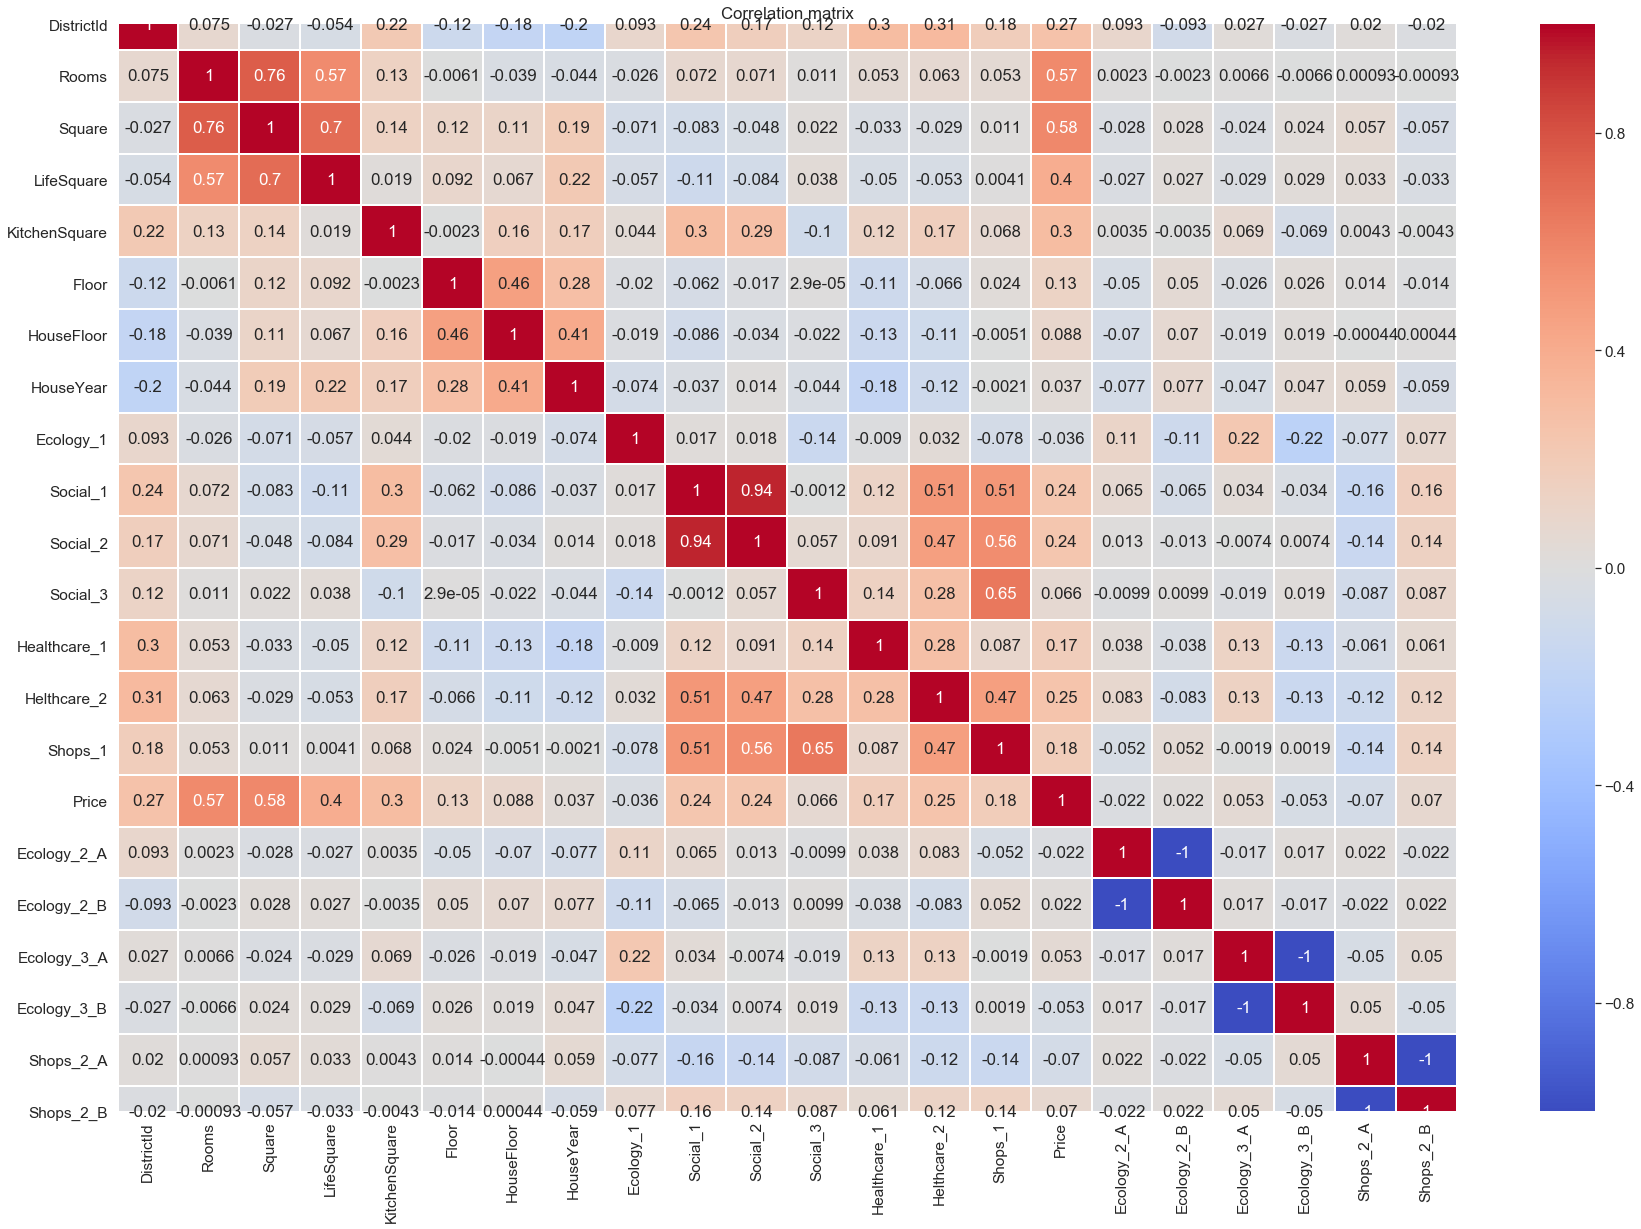

In [62]:
plt.figure(figsize = (30,20))
sns.set(font_scale = 1.4)
sns.heatmap(df.corr(), annot =True, linewidths = 1, cmap ='coolwarm')
plt.title('Correlation matrix')
plt.show()

Разделяем расчетную переменную и признаки

Убираем признаки Helthcare_2 и Social_2 т.к. корреляция большая с признаком Social_2

Также убираем признак Rooms корреляция большая с признаком Square

Убираем бинарные признаки с литерой А

In [63]:
target = 'Price'
feature_names = ['DistrictId', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
'Ecology_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2_B', 'Ecology_3_B','Shops_2_B']

In [64]:
df =df[feature_names+ [target]]
df.head()

,DistrictId,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_B,Ecology_3_B,Shops_2_B,Price
0,35,47.981561,29.442751,6.0,7,9.0,1969,0.089040,7976,5.0,0,11,1,1,1,184966.930730
1,41,65.683640,40.049543,8.0,7,9.0,1978,0.000070,10309,1.0,1,16,1,1,1,300009.450063
2,53,44.947953,29.197612,6.0,8,12.0,1968,0.049637,7759,2.0,1,3,1,1,1,220925.908524
3,58,53.352981,52.731512,9.0,8,17.0,1977,0.437885,5735,3.0,0,5,1,1,1,175616.227217
4,99,39.649192,23.776169,7.0,11,12.0,1976,0.012339,5776,1.0,2,4,1,1,1,150226.531644


Стандартизируем данные

In [65]:
features_names_for_stand = df[feature_names].select_dtypes(include= ['float64', 'int64','uint8']).columns.tolist()
features_names_for_stand

['DistrictId',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Ecology_2_B',
 'Ecology_3_B',
 'Shops_2_B']

In [66]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[features_names_for_stand])

In [67]:
df[features_names_for_stand] = pd.DataFrame(stand_features, columns = features_names_for_stand)

In [68]:
df.head()

,DistrictId,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_B,Ecology_3_B,Shops_2_B,Price
0,-0.357223,-0.438457,-0.429103,-0.034928,-0.291306,-0.629946,-0.861770,-0.291578,0.654880,-0.153882,-0.883480,1.408356,0.09897,0.16816,0.299864,184966.930730
1,-0.219214,0.496966,0.280859,0.512957,-0.291306,-0.629946,-0.372930,-1.057538,1.237169,-0.323048,-0.213923,2.448700,0.09897,0.16816,0.299864,300009.450063
2,0.056805,-0.598761,-0.445512,-0.034928,-0.100498,-0.149255,-0.916085,-0.630802,0.600720,-0.280757,-0.213923,-0.256195,0.09897,0.16816,0.299864,220925.908524
3,0.171812,-0.154618,1.129722,0.786899,-0.100498,0.651898,-0.427246,2.711711,0.095553,-0.238465,-0.883480,0.159943,0.09897,0.16816,0.299864,175616.227217
4,1.114875,-0.878761,-0.808394,0.239015,0.471924,-0.149255,-0.481561,-0.951912,0.105786,-0.323048,0.455633,-0.048126,0.09897,0.16816,0.299864,150226.531644


Разбиение датасета на train и test

In [69]:
y= df[target]
x = df[feature_names]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.3, random_state = 21, shuffle =True)

Подбор  модели  n_estimators = 250, max_depth= 5 ( Определили через Gridsearch)

In [71]:
final_model = GradientBoostingRegressor(random_state = 21, n_estimators = 250, max_depth= 5)
final_model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='auto',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
y_train_pred = final_model.predict(x_test)
R2 = metrics.r2_score(y_test, y_train_pred)
R2

0.7397846803232068

In [73]:
s = pd.DataFrame({'feature' : x_train.columns, 'importance' : final_model.feature_importances_}).sort_values(by= 'importance', ascending = False) 
s1 =s.reset_index()
s1.head(25)

,index,feature,importance
0,1,Square,0.460863
1,8,Social_2,0.203515
2,9,Social_3,0.075246
3,0,DistrictId,0.063682
4,7,Ecology_1,0.039955
5,6,HouseYear,0.034044
6,2,LifeSquare,0.030869
7,5,HouseFloor,0.025168
8,3,KitchenSquare,0.022620
9,4,Floor,0.020694


Обработка тестовых данных

_

In [74]:
test = 'test.csv'

In [75]:
df_test = pd.read_csv(test)
df_test.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,B,B,46,7960,6,350.0,3,11,B
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,B,B,53,14892,4,NaN,1,4,B
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


In [76]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [77]:
df_test['Id'] = df_test['Id'].astype(str)

In [78]:
def change_test (x):
    df_test.loc[df_test[x].isnull(), x] = df_test[x].median()

In [79]:
change_test ('LifeSquare')

In [80]:
df_test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,51.279200,1.910000,56.449500,35.485549,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,44.179466,0.838594,19.092787,15.915345,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,21.000000,1.000000,41.906231,25.850152,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,77.000000,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [81]:
def change_null_test (x):
    df_test.loc[df_test[x] == 0, x] = df_test[x].median()

In [82]:
change_null_test('Rooms')
change_null_test('HouseFloor')
change_null_test('Ecology_1')
change_null_test('Social_1')
change_null_test('Social_3')

In [83]:
 df_test.loc[df_test['DistrictId'] == 0, 'DistrictId'] = 27

In [84]:
def change_1_test (x, y):
    df_test.loc[df_test[x] < y, x] = df_test[x].median()

In [85]:
change_1_test('Square', 25)
change_1_test('LifeSquare', 10)
change_1_test('KitchenSquare', 1)

In [86]:
def change_2_test (x, y):
    df_test.loc[df_test[x] > y, x] = df_test[x].median()

In [87]:
change_2_test ('Rooms', 5)
change_2_test ('KitchenSquare', 35)
df_test.loc[(df_test['Square'] > 200) & (df_test['Rooms'] < 3), 'Square'] = df_test['Square'].median()
df_test.loc[df_test['LifeSquare'] >  df_test['Square'], 'LifeSquare'] = df_test['Square']
df_test.loc[(df_test['HouseFloor'] > 50) & (df_test['HouseYear'] < 2000), 'HouseFloor'] = df_test['HouseFloor'].median()

In [88]:
df_test = pd.concat([df_test, pd.get_dummies(df_test['Ecology_2'])], axis = 1)
df_test = df_test.rename(columns={'A': 'Ecology_2_A', 'B': 'Ecology_2_B'})
df_test = pd.concat([df_test, pd.get_dummies(df_test['Ecology_3'])], axis = 1)
df_test = df_test.rename(columns={'A': 'Ecology_3_A', 'B': 'Ecology_3_B'})
df_test = pd.concat([df_test, pd.get_dummies(df_test['Shops_2'])], axis = 1)
df_test = df_test.rename(columns={'A': 'Shops_2_A', 'B': 'Shops_2_B'})

In [89]:
df_test = df_test.drop(['Ecology_2', 'Shops_2', 'Ecology_3'], axis = 'columns')

In [90]:
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,1.0,NaN,0,0,0,1,0,1,0,1
1,15856,74,2.0,69.263183,32.925087,1.0,6,1.0,1977,0.075779,...,3.0,NaN,0,2,0,1,0,1,0,1
2,5480,190,1.0,52.921340,15.948246,12.0,2,5.0,1909,0.072158,...,87.0,4702.0,5,5,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,3.0,NaN,3,3,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,1.0,NaN,0,0,0,1,0,1,1,0


In [91]:
features_names_for_stand_test = df_test[feature_names].select_dtypes(include= ['float64', 'int64','uint8']).columns.tolist()
features_names_for_stand_test

['DistrictId',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Ecology_2_B',
 'Ecology_3_B',
 'Shops_2_B']

In [92]:
scaler = StandardScaler()
stand_features_test = scaler.fit_transform(df_test[features_names_for_stand_test])

In [93]:
df_test[features_names_for_stand] = pd.DataFrame(stand_features_test, columns = features_names_for_stand_test)
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,0.150116,2.0,-0.359086,-0.175405,-0.033305,-0.480057,0.173479,-0.667299,1.590331,...,-0.331607,NaN,-0.891612,-0.888194,0,0.098453,0,0.175258,0,0.299666
1,15856,0.513034,2.0,0.676768,-0.210324,-1.437416,-0.480057,-1.873007,-0.398066,-0.410787,...,-0.247127,NaN,-0.891612,-0.469511,0,0.098453,0,0.175258,0,0.299666
2,5480,3.144190,1.0,-0.196673,-1.377969,1.651627,-1.209627,-1.243319,-4.059632,-0.441699,...,3.301004,4702.0,2.487242,0.158513,0,0.098453,0,0.175258,0,0.299666
3,15664,-0.099390,2.0,0.878985,1.097556,0.809161,2.438224,1.432855,1.217331,-0.188040,...,-0.247127,NaN,1.135700,-0.260169,0,0.098453,0,0.175258,0,0.299666
4,14275,-0.553037,1.0,-0.484985,0.509273,-1.437416,1.526261,0.645745,1.755796,-0.441699,...,-0.331607,NaN,-0.891612,-0.888194,0,0.098453,0,0.175258,1,-3.337053


In [94]:
df_test_1 =df_test[feature_names]
df_test_1.head()

,DistrictId,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_B,Ecology_3_B,Shops_2_B
0,0.150116,-0.359086,-0.175405,-0.033305,-0.480057,0.173479,-0.667299,1.590331,-0.660397,-0.331607,-0.891612,-0.888194,0.098453,0.175258,0.299666
1,0.513034,0.676768,-0.210324,-1.437416,-0.480057,-1.873007,-0.398066,-0.410787,-0.986014,-0.247127,-0.891612,-0.469511,0.098453,0.175258,0.299666
2,3.144190,-0.196673,-1.377969,1.651627,-1.209627,-1.243319,-4.059632,-0.441699,0.529306,3.301004,2.487242,0.158513,0.098453,0.175258,0.299666
3,-0.099390,0.878985,1.097556,0.809161,2.438224,1.432855,1.217331,-0.188040,-0.204634,-0.247127,1.135700,-0.260169,0.098453,0.175258,0.299666
4,-0.553037,-0.484985,0.509273,-1.437416,1.526261,0.645745,1.755796,-0.441699,-1.186699,-0.331607,-0.891612,-0.888194,0.098453,0.175258,-3.337053


Предсказание целевой переменной

In [95]:
y_test_pred = final_model.predict(df_test_1)
y_test_pred

array([150684.97959651, 217691.86757112, 217226.9987785 , ...,
       352197.87842558, 197951.49538387, 155203.23086892])

In [96]:
df_pred = pd.DataFrame(zip(df_test['Id'],y_test_pred ), columns = [ 'Id', 'Price'])
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
Id       5000 non-null object
Price    5000 non-null float64
dtypes: float64(1), object(1)
memory usage: 78.2+ KB


In [97]:
SAVE_PATH = 'DKonkin_prediction.csv'

In [98]:
df_pred.to_csv(SAVE_PATH, index= False, encoding = 'utf-8')